In [7]:
import pandas as pd
import re

def parse_file(text_file):
    '''Convert WhatsApp chat log text file to a Pandas dataframe.'''
    
    # some regex to account for messages taking up multiple lines
    #pat = re.compile(r'^(\d\d\/\d\d\/\d\d\d\d.*?)(?=^^\d\d\/\d\d\/\d\d\d\d|\Z)', re.S | re.M)
    with open(text_file,encoding='utf-8') as f:
        #data = [m.group(1).strip().replace('\n', ' ') for m in pat.finditer(f.read())]
        pass
    data=pd.read_csv(text_file)
    print('data=',data)
    sender = []; message = []; datetime = []
    for row in data:

        # timestamp is before the first dash
        datetime.append(row.split(' - ')[0])

        # sender is between am/pm, dash and colon
        try:
            s = re.search('m - (.*?):', row).group(1)
            sender.append(s)
        except:
            sender.append('')

        # message content is after the first colon
        try:
            message.append(row.split(': ', 1)[1])
        except:
            message.append('')

    df = pd.DataFrame(zip(datetime, sender, message), columns=['timestamp', 'sender', 'message'])
    df['timestamp'] = pd.to_datetime(df.timestamp, format='%d/%m/%Y, %I:%M %p')

    # remove events not associated with a sender
    df = df[df.sender != ''].reset_index(drop=True)
    
    return df

MsgTable = parse_file('WhatsApp Chat with Anaga.txt')
MsgTable = MsgTable.tail(1000)
print(MsgTable.tail(19))

ParserError: Error tokenizing data. C error: Expected 2 fields in line 4, saw 3


['Nagendra' 'Lola Infosys' 'Theja' 'Arun Bhadardwaj' 'Hrushikesh'
 'Bhavan Play' 'Vishak' 'Anni jss' 'Abhilash' 'Nikil Play'
 '+91 96114 15882' 'Vinay']


c:\users\h.mysore.srinivas\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\h.mysore.srinivas\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56621 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\h.mysore.srinivas\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 129325 missing from current font.
  font.load_char(ord(s), flags=flags)
c:\users\h.mysore.srinivas\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\h.mysore.srinivas\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\backends\backend_agg.py:

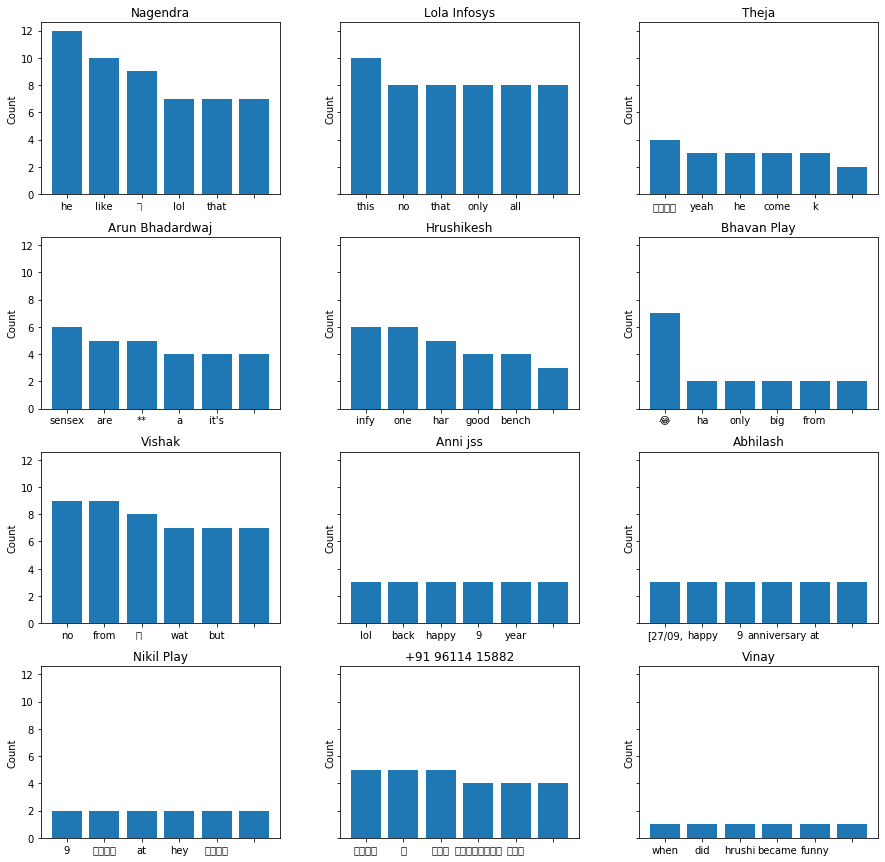

In [12]:
# FInding the most frequently used words by each grop member
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
#import seaborn as sns

MsgTable['message']=MsgTable['message'].astype(str)
MsgTable=MsgTable[MsgTable.sender.str.contains("changed" or "removed" or "added")==False]
Names=MsgTable.sender.unique()[0:12]

print(Names)
plot_number=0
fig, axs = plt.subplots(figsize=(15,15), ncols=3, nrows=4,sharey=True)
fig.subplots_adjust(hspace = .25, wspace=.25)
axs = axs.ravel()

for name in Names:
    
    MsgTableTemp=MsgTable.loc[MsgTable['sender']==name]
    MsgList = MsgTableTemp['message'].tolist()
    

#     stop_words = set(stopwords.words('english'))
    WordList=' '.join(MsgTableTemp['message']).lower().split()
#     filtered_WordList = [w for w in WordList if not w in stop_words]


    from collections import Counter
    df = pd.DataFrame.from_dict(dict(Counter(WordList)), orient='index').reset_index()
    df.columns =['Word','Count']
    DropWords = ['',':)','pm','r','n','ya','ok','?','and','-','u','to','for','with','of','in','..','<omitted','image','<media','omitted>','it','none','i','is','will','the','you']
    df['Word'].replace(DropWords, np.nan, inplace=True)
    df.dropna(subset=['Word'], inplace=True)
    df.sort_values(['Count'],ascending=False,inplace=True)
    #sns.distplot(df.head(),        kde = False, ax=ax[0][plot_number])
    df['Word'] = df['Word'].astype('str')
    labels=df['Word'].iloc[0:6]
    dd = np.arange(len(labels))
    axs[plot_number].bar(dd,df['Count'].iloc[0:6],label=name)
    #df.iloc[0:10].plot(kind='bar',title=name)
    #plt.xticks(dd,labels)
    #plt.show()
    axs[plot_number].set_ylabel("Count")
    axs[plot_number].set_title(name)
    axs[plot_number].set_xticklabels(labels,fontdict=None, minor=False)
    plot_number = plot_number + 1
plt.show()


# sns.set_style("whitegrid")
# ax = sns.barplot(x="Word", y="Count", data=df.head())


In [3]:
import itertools
x = MsgTable.sender.values

names = []; message_length = []
# generates a new group every time the value of the list changes
# https://docs.python.org/2/library/itertools.html#itertools.groupby
for k, g in itertools.groupby(x):
    names.append(k)
    message_length.append(len(list(g)))
    
df2 = pd.DataFrame(zip(names, message_length), columns=['sender', 'length'])

print(df2.head())

            sender  length
0           Vishak       1
1         Anni jss       2
2      Bhavan Play       1
3  Arun Bhadardwaj       1
4         Nagendra       1


In [84]:
MsgTable[['message','sender']].groupby('sender').count().sort_values('message',ascending=False)

,message
sender,
Vishak,8643
Arun Bhadardwaj,6669
Nagendra,5229
Lola Infosys,4275
Bhavan Play,3775
Anni jss,2336
Theja,2258
Abhilash,2132
Hrushikesh,1132


In [87]:
MsgTable['characters'] = MsgTable.message.apply(len)
MsgTable['words'] = MsgTable.message.apply(lambda x: len(x.split()))

MsgTable.groupby('sender').mean().sort_values('characters').round(2).sort_values('words',ascending=False)



,characters,words
sender,,
Chatura,61.78,9.02
Anni jss,45.03,8.01
Abhilash,46.67,6.69
Lola Infosys,40.23,6.48
Arun Bhadardwaj,41.56,6.33
Nagendra,28.70,5.23
Vinay,26.18,4.82
Theja,27.85,4.69
Hrushikesh,24.06,4.44
